In [1]:
# Required Python libraries
import pandas as pd
import numpy as np
import os
from sklearn.tree import export_graphviz
import pydot
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
# Read in data and display first 5 rows
features = pd.read_csv('agaricus-lepiota.csv')
features.columns = ['Prediction Value','cap-shape','cap-surface','cap-color','bruises','odor','gill-attachment','gill-spacing',
             'gill-size','gill-color','stalk-shape','stalk-root','stalk-surface-above-ring','stalk-surface-below-ring','stalk-color-above-ring',
             'stalk-color-below-ring','veil-type','veil-color','ring-number','ring-type','spore-print-color','population',
             'habitat']
features.head(5)

,Prediction Value,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g


In [3]:
print('The shape of our features is:', features.shape)

The shape of our features is: (8123, 23)


In [4]:
# Descriptive statistics for each column
features.describe()

,Prediction Value,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8123,8123,8123,8123,8123,8123,8123,8123,8123,8123,...,8123,8123,8123,8123,8123,8123,8123,8123,8123,8123
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3655,3244,2283,4748,3528,7913,6811,5612,1728,...,4935,4463,4383,8123,7923,7487,3967,2388,4040,3148


In [5]:
# One-hot encode the data using pandas get_dummies
features = pd.get_dummies(features)
# Display the first 5 rows of the last 12 columns
features.iloc[:,5:].head(5)

,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_b,cap-color_c,cap-color_e,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
3,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [6]:
# Use numpy to convert to arrays
# Labels are the values we want to predict
labels = np.array(features['Prediction Value_e'])
# Remove the labels from the features
# axis 1 refers to the columns
features= features.drop('Prediction Value_e', axis = 1)
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

In [7]:
# Using Skicit-learn to split data into training and testing sets
# Split the data into training and testing sets
x_train,x_test,y_train,y_test = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [8]:
print('Training Features Shape:', x_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', x_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (6092, 118)
Training Labels Shape: (6092,)
Testing Features Shape: (2031, 118)
Testing Labels Shape: (2031,)


In [9]:
#create and train model
model = RandomForestClassifier(n_estimators=1000,max_features='auto',bootstrap=True,criterion='entropy',n_jobs=1)
model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [10]:
#predict test values
y_pred = model.predict(x_test)

In [11]:
#Print classification Report based on Predicted values
print("Classification Report: \n\n",metrics.classification_report(y_pred,y_test,target_names=["e","p"]))

Classification Report: 

              precision    recall  f1-score   support

          e       1.00      1.00      1.00       969
          p       1.00      1.00      1.00      1062

avg / total       1.00      1.00      1.00      2031



Text(89.18,0.5,'Predicted value')

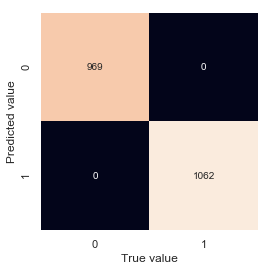

In [12]:
#print the confusion metrix based on the test values
sns.set()
get_ipython().run_line_magic('matplotlib','inline')

mat = confusion_matrix(y_test,y_pred)
sns.heatmap(mat.T,square=True,annot=True,fmt='d',cbar=False)
plt.xlabel('True value')
plt.ylabel('Predicted value')

In [13]:
#Print tree as a image
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)Graphviz2.38/bin/'

tree = model.estimators_[1]

export_graphviz(tree,out_file='tree.dot',feature_names=feature_list,rounded=True,precision=1)

(graph,) = pydot.graph_from_dot_file('tree.dot')
graph.write_png('tree.png')

In [14]:
#Output feature importance
importences = list(model.feature_importances_)
feature_importances = [(features,round(importences,2)) for features, importences in zip(feature_list,importences)]
feature_importances = sorted(feature_importances,key=lambda x:x[1],reverse=True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Prediction Value_p   Importance: 0.24
Variable: odor_n               Importance: 0.09
Variable: odor_f               Importance: 0.06
Variable: gill-size_n          Importance: 0.05
Variable: gill-size_b          Importance: 0.04
Variable: gill-color_b         Importance: 0.04
Variable: stalk-surface-above-ring_k Importance: 0.03
Variable: stalk-surface-below-ring_k Importance: 0.03
Variable: spore-print-color_h  Importance: 0.03
Variable: bruises_f            Importance: 0.02
Variable: bruises_t            Importance: 0.02
Variable: ring-type_l          Importance: 0.02
Variable: ring-type_p          Importance: 0.02
Variable: population_v         Importance: 0.02
Variable: odor_a               Importance: 0.01
Variable: odor_c               Importance: 0.01
Variable: odor_p               Importance: 0.01
Variable: gill-spacing_c       Importance: 0.01
Variable: gill-spacing_w       Importance: 0.01
Variable: stalk-shape_e        Importance: 0.01
Variable: stalk-shape_t     

Text(0.5,1,'Variable importance')

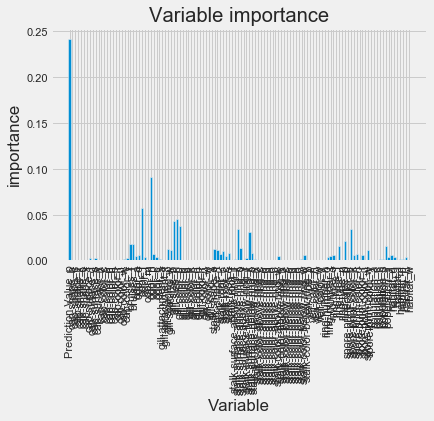

In [15]:
#feature importance ploted
get_ipython().run_line_magic('matplotlib','inline')
plt.style.use('fivethirtyeight')
x_values = list(range(len(importences)))
plt.bar(x_values,importences,orientation='vertical')
plt.xticks(x_values,feature_list,rotation='vertical')
plt.ylabel('importance')
plt.xlabel('Variable')
plt.title('Variable importance')

In [16]:
#print accuracy
print("Accuracy of an algorithm :",metrics.accuracy_score(y_test, y_pred)*100)

Accuracy of an algorithm : 100.0
